In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

In [7]:
cancer.data.shape

(569, 30)

In [8]:
X_w_noise.shape

(569, 80)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [10]:
print(X_train.shape, X_test.shape)

(284, 80) (285, 80)


In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9508771929824561

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.617150168548626

In [15]:
select = SelectPercentile(score_func=f_classif, percentile=0.5)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print(X_train.shape, X_train_selected.shape)

(284, 80) (284, 1)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


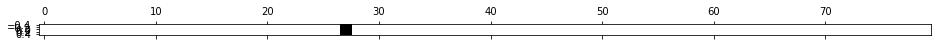

In [18]:
mask = select.get_support()
print(mask)
import matplotlib.pyplot as plt
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [19]:
import mglearn
citibike = mglearn.datasets.load_citibike()

In [20]:
citibike[:3]

starttime
2015-08-01 00:00:00    3
2015-08-01 03:00:00    0
2015-08-01 06:00:00    9
Freq: 3H, Name: one, dtype: int64

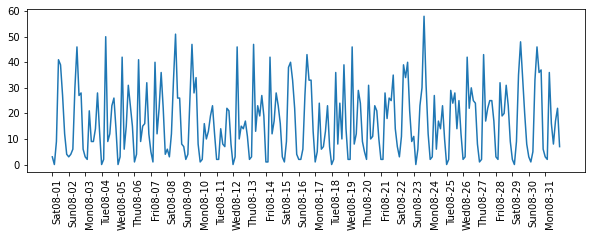

In [21]:
import pandas as pd
plt.figure(figsize=(10,3))
xticks=pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq="D")
week=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
xticks_name=[week[int(w)]+d for w, d in zip(xticks.strftime("%w"),xticks.strftime("%m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike)
plt.show()

In [23]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1,1) // 10**9

In [30]:
n_train = 8*23
def eval_on_features(features, target, regressor):
    X-train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("score:{:.2f}".foramt(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
    
    plt.plot(range(0, n_train), n_train+len(y_test), y_test, label="test")
    plt.plot(range(0, n_train), y_pred_train, '--', label="pred_train")
    plt.plot(range(n_train, n_train+len(y_test),y_pred, '--', label="pred_test")
    plt.plot(range(n_train), y_train, label="train")
             
    plt.legend(loc=(1.01,0))
    plt.show()

SyntaxError: invalid syntax (<ipython-input-30-723057246bef>, line 16)

In [31]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, reg)

NameError: name 'eval_on_features' is not defined

In [34]:
682/553

1.2332730560578662